In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/ca-GrQc.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 1269
Number of deinfluenced nodes: 0
Number of susceptible nodes: 3973
influencer {21635, 9988, 16261, 20229, 23175, 14985, 24330, 15244, 9869, 6804, 13333, 24340, 21657, 15386, 16155, 22556, 9892, 21800, 299, 21931, 24113, 18741, 20793, 2490, 11325, 21438, 22463, 12868, 21191, 21579, 20557, 11470, 23757, 4952, 20953, 1498, 22235, 22493, 8672, 13282, 12642, 16888, 13931, 22644, 25844, 21623, 12664, 18684, 25597, 11903}


In [4]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {6667, 16932, 8222}, 'Degree': set()}), (20, {'Random': {8801, 11491, 9098, 11053, 24765, 1727}, 'Degree': {21012}}), (30, {'Random': {15682, 23810, 9194, 21547, 2476, 46, 19568, 25649, 24340, 1013}, 'Degree': {21281, 21012}}), (40, {'Random': {13026, 1092, 3654, 8615, 21544, 4488, 8458, 15947, 14, 8718, 20174, 19314, 22836, 3607, 10620, 19164, 12733}, 'Degree': {21281, 22691, 21012}}), (50, {'Random': {6529, 1347, 18182, 17191, 1962, 11626, 16331, 1966, 11823, 4975, 4081, 18161, 4755, 23093, 4634, 13371, 16511}, 'Degree': {21281, 22691, 21012}}), (60, {'Random': {773, 24199, 4624, 11034, 16922, 12192, 21798, 19880, 5548, 20783, 6709, 8374, 10552, 9915, 8263, 9419, 1229, 8408, 15582, 3449}, 'Degree': {21281, 22691, 21012, 12365}}), (70, {'Random': {6408, 7309, 18581, 2200, 19865, 24479, 2080, 2339, 21799, 7595, 23723, 7985, 14131, 17341, 16576, 14547, 15194, 18271, 22239, 3178, 8298, 16755, 7546}, 'Degree': {21281, 22691, 12365,

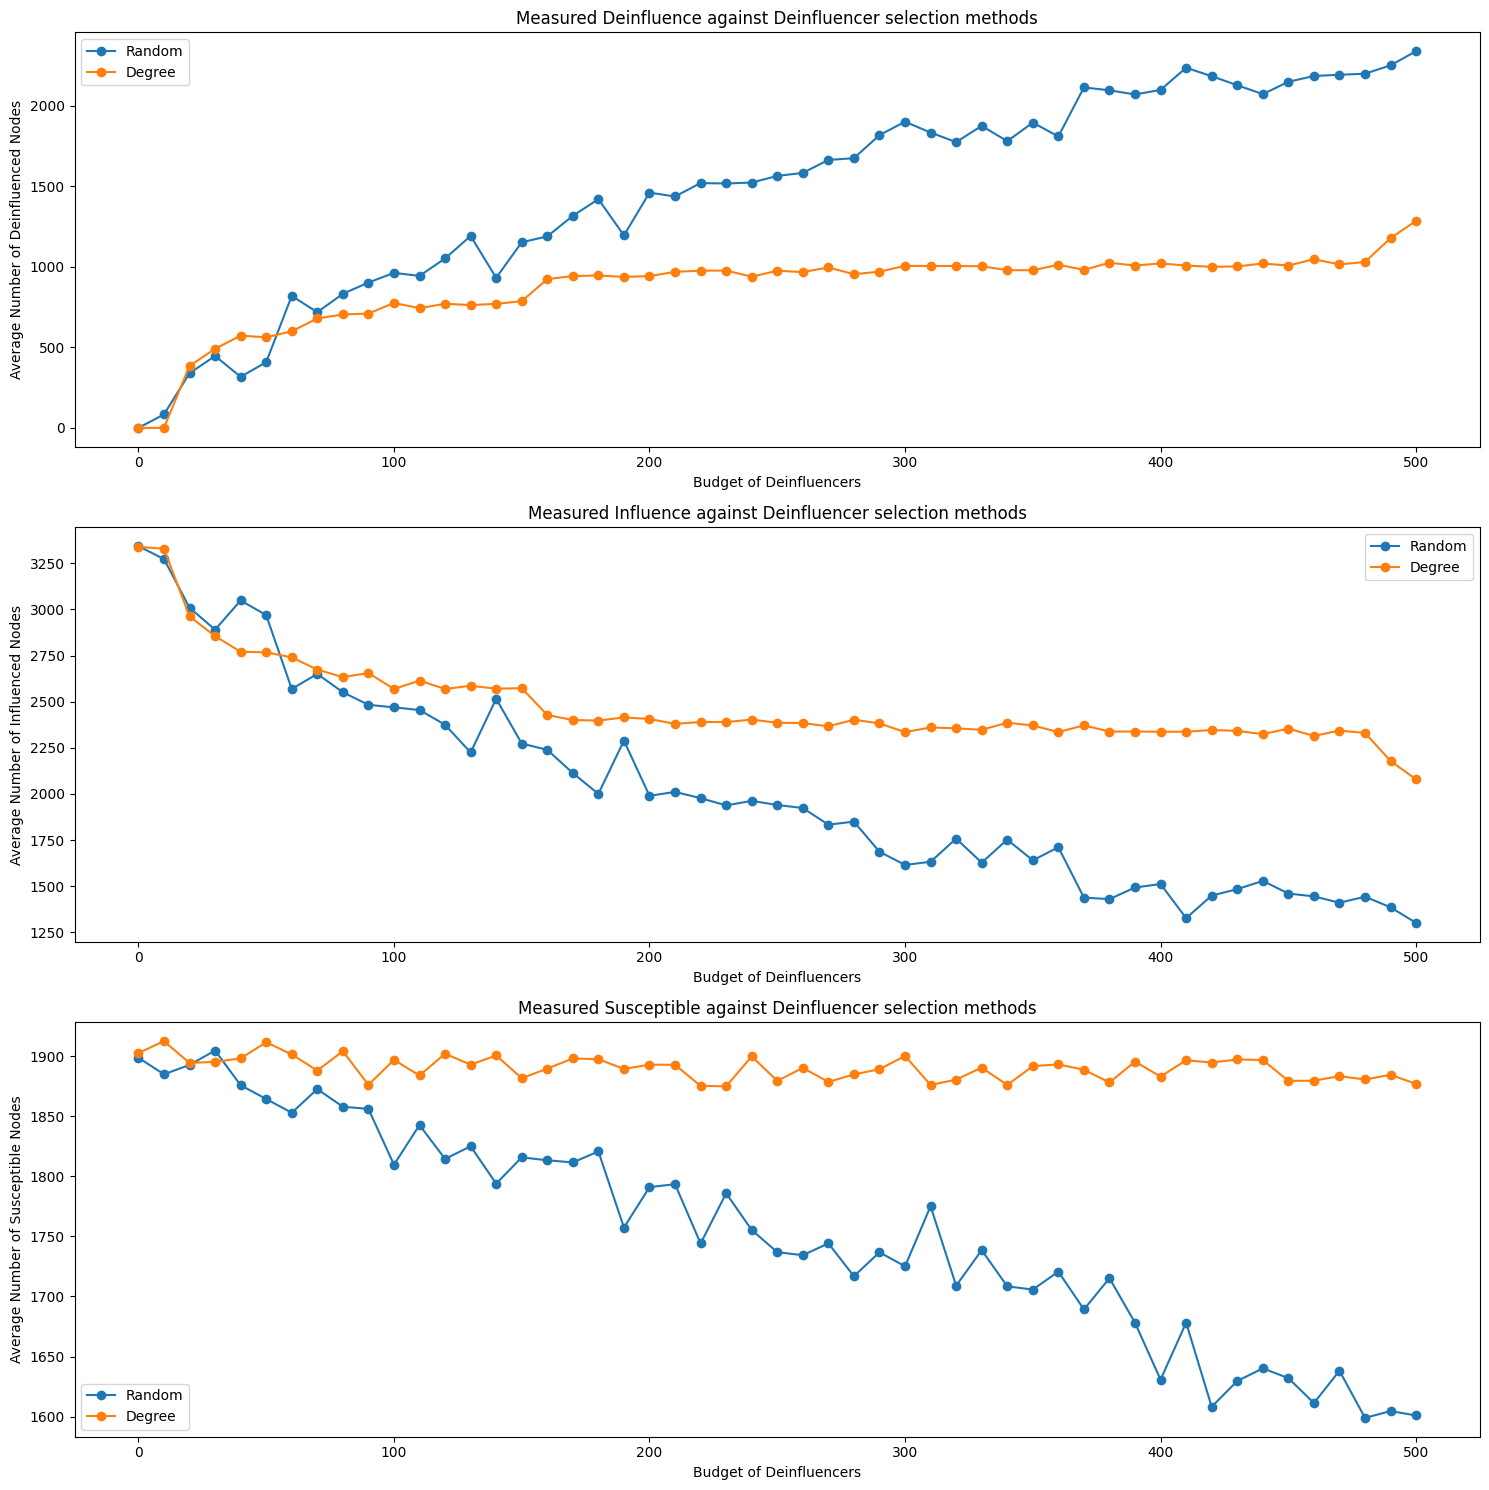

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 10))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (10, {'Random': {22426, 7125, 8710}, 'Degree': set()}), (20, {'Random': {13283, 25220, 6408, 10133, 7958, 8920, 10588}, 'Degree': {21012}}), (30, {'Random': {5409, 21638, 1386, 22507, 19598, 11822, 1497, 19741, 11613, 17823}, 'Degree': {21281, 21012}}), (40, {'Random': {16226, 18743, 15246, 12049, 5427, 15187, 24183, 570, 15933}, 'Degree': {21281, 22691, 21012}}), (50, {'Random': {16131, 17426, 1556, 7446, 6431, 15907, 10406, 14384, 5835, 16333, 23757, 2515, 15316, 20956, 8678, 24295, 7533, 2926, 6642, 8063}, 'Degree': {21281, 22691, 21012}}), (60, {'Random': {16128, 1793, 4484, 8976, 8215, 10391, 11416, 1696, 5667, 6443, 19379, 3651, 4040, 16971, 11472, 19164, 4705, 5360, 22770, 17019}, 'Degree': {21281, 22691, 21012, 12365}}), (70, {'Random': {17280, 5656, 6300, 23712, 7585, 18340, 17580, 7853, 24753, 10805, 14007, 22199, 20536, 17981, 9151, 15553, 16708, 15943, 13385, 205, 15191, 17882, 21466, 13035, 18159, 19711}, 'Degree': {21281, 22691, 1

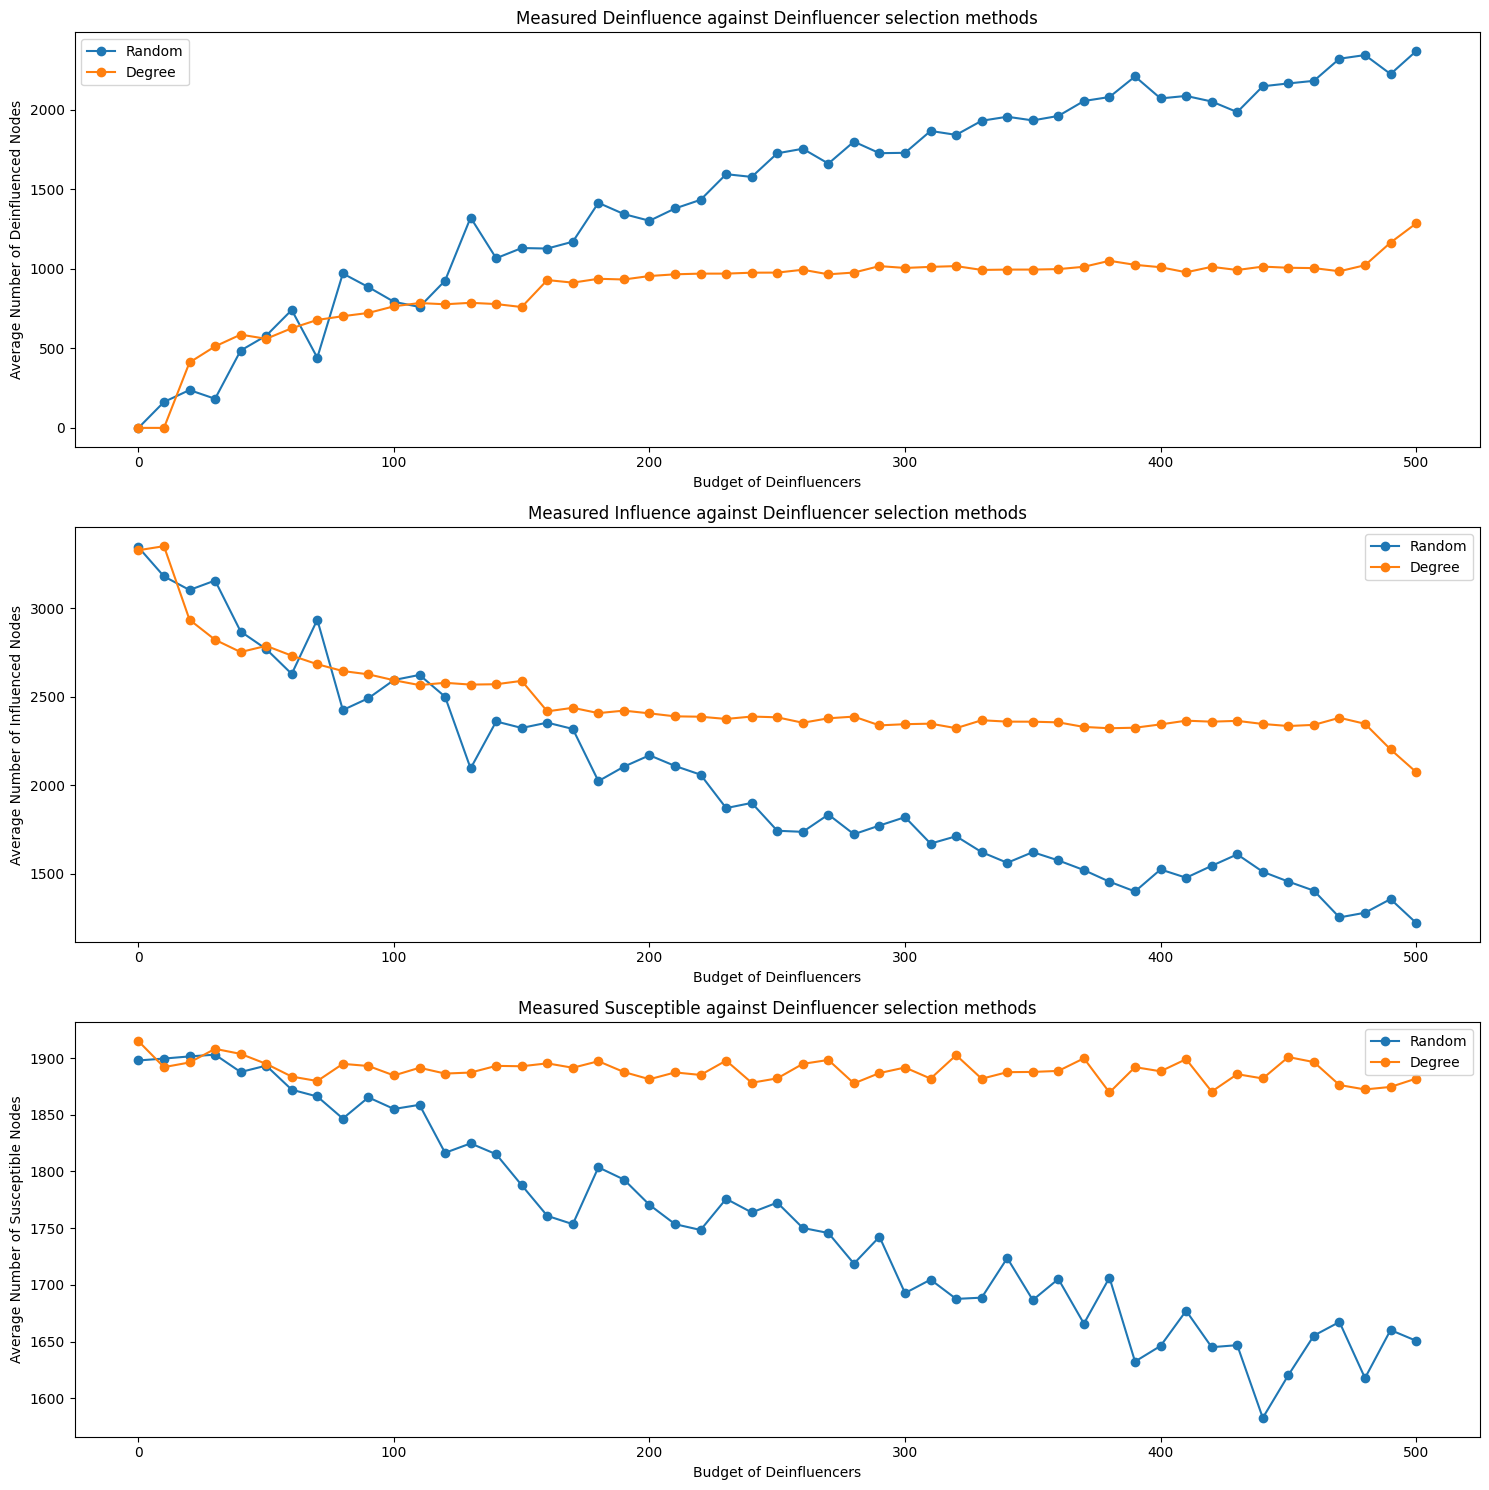

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()